# Text Preprocessing for use with Topic Models

The text has already been cleaned.  This script will preprocess it - tokenize, remove stop words, add bigrams and trigrams, lemmatize.

**Note**: There is an important change in order from past runs of the code here. Now, lemmatization and tokenization occurs within the same step.  Some clean up including stop word removal and the creation of n-grams occurs AFTER lemmatization

In [10]:
import pandas as pd
import pickle
import nltk
import numpy as np
import time
import matplotlib.pyplot as plt

import stanza
import gensim
import re

#import TextCleaning
import LDAvariables

### Read in Clean Dataset

In [4]:
# load saved df.  df['working_abstract'] contains clean text.
df = pd.read_pickle("../../data/working/clean_data_7-20.pkl")
df.reset_index(inplace = True)
df.rename(columns={'index':'original index'}, inplace=True)

wa='working_abstract'

In [ ]:
# calculating lemmatization time


In [6]:
sum(df['nchar'][0:1000])

1863274

In [7]:
n = len(df)/1000
num_chars = []

for i in range(int(n)):
    num_chars.append(sum(df['nchar'][i*1000:(i+1)*1000]))
    
print(len(num_chars))

690


In [8]:
180/num_chars[0] # 0.00009 s per char

9.660414947023358e-05

(array([ 1.,  1.,  0.,  0.,  2.,  3.,  1.,  4.,  3.,  5.,  8., 11., 16.,
        11., 22.,  9., 16., 15., 13., 19., 28., 28., 50., 76., 67., 63.,
        57., 37., 51., 17., 13.,  6.,  3.,  2.,  1.,  1.,  1.,  0.,  2.,
         4.,  1.,  1.,  0.,  4.,  2.,  3.,  6.,  3.,  2.,  1.]),
 array([1352235.  , 1398257.38, 1444279.76, 1490302.14, 1536324.52,
        1582346.9 , 1628369.28, 1674391.66, 1720414.04, 1766436.42,
        1812458.8 , 1858481.18, 1904503.56, 1950525.94, 1996548.32,
        2042570.7 , 2088593.08, 2134615.46, 2180637.84, 2226660.22,
        2272682.6 , 2318704.98, 2364727.36, 2410749.74, 2456772.12,
        2502794.5 , 2548816.88, 2594839.26, 2640861.64, 2686884.02,
        2732906.4 , 2778928.78, 2824951.16, 2870973.54, 2916995.92,
        2963018.3 , 3009040.68, 3055063.06, 3101085.44, 3147107.82,
        3193130.2 , 3239152.58, 3285174.96, 3331197.34, 3377219.72,
        3423242.1 , 3469264.48, 3515286.86, 3561309.24, 3607331.62,
        3653354.  ]),
 <a list of 50

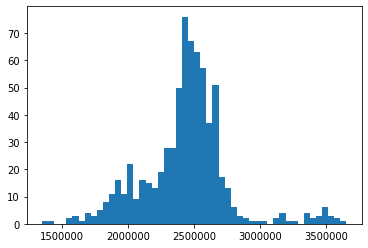

In [11]:
plt.hist(x = num_chars, bins=50)

In [12]:
0.0001*num_chars[0]

186.3274

In [13]:
((2500000 - 1900000)/1900000)*184

58.10526315789473

In [14]:
(180 + 59) # 239 seconds ~4 mins

239

In [23]:
(4*700)/60

46.666666666666664

In [15]:
(sum(num_chars)*0.0001)/3600

46.700432777777785

In [30]:
import statistics
statistics.median(num_chars)

2459209.5

### Tokenize, find POS, and Lemmatize

In [3]:
# Create a stanza pipeline: this pipeline will tokenize, determine pos, 
# and then lemmatize the token appropriately.

nlp = stanza.Pipeline(lang='en',processors='tokenize,pos,lemma',tokenize_batch_size=500,lemma_batch_size=500,
                      use_gpu = True)

2020-07-16 00:59:35 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| pos       | ewt     |
| lemma     | ewt     |

2020-07-16 00:59:35 INFO: Use device: gpu
2020-07-16 00:59:35 INFO: Loading: tokenize
2020-07-16 01:00:00 INFO: Loading: pos
2020-07-16 01:00:01 INFO: Loading: lemma
2020-07-16 01:00:01 INFO: Done loading processors!


In [35]:
# Do not need with speed up from GPU

            # spacy - sometimes " " slips through as a token, doesn't recognize hyphens as part of a token. splits on them
            #if word.text == " ":
                
            #else:

nlp2 = stanza.Pipeline(lang = 'en', processors = {'tokenize': 'spacy'}) #tokenize_no_ssplit=True)

2020-07-16 00:35:38 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | spacy     |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-07-16 00:35:38 INFO: Use device: cpu
2020-07-16 00:35:38 INFO: Loading: tokenize
2020-07-16 00:35:38 INFO: Using spaCy as tokenizer
2020-07-16 00:35:38 INFO: Loading: pos
2020-07-16 00:35:39 INFO: Loading: lemma
2020-07-16 00:35:39 INFO: Loading: depparse
2020-07-16 00:35:40 INFO: Loading: ner
2020-07-16 00:35:41 INFO: Done loading processors!


In [36]:
temp = nlp2(df[wa][1])
temp

[
  [
    {
      "id": "1",
      "text": "Institution",
      "lemma": "institution",
      "upos": "NOUN",
      "xpos": "NN",
      "feats": "Number=Sing",
      "head": 0,
      "deprel": "root",
      "misc": "start_char=0|end_char=11"
    },
    {
      "id": "2",
      "text": ":",
      "lemma": ":",
      "upos": "PUNCT",
      "xpos": ":",
      "head": 1,
      "deprel": "punct",
      "misc": "start_char=11|end_char=12"
    },
    {
      "id": "3",
      "text": " ",
      "lemma": " ",
      "upos": "PROPN",
      "xpos": "NNP",
      "feats": "Number=Sing",
      "head": 6,
      "deprel": "compound",
      "misc": "start_char=13|end_char=14"
    },
    {
      "id": "4",
      "text": "Science",
      "lemma": "Science",
      "upos": "PROPN",
      "xpos": "NNP",
      "feats": "Number=Sing",
      "head": 6,
      "deprel": "compound",
      "misc": "start_char=14|end_char=21"
    },
    {
      "id": "5",
      "text": "Museum",
      "lemma": "Museum",
      "upos"

In [26]:
for sent in temp.sentences:
    for word in sent.words:
        print(word)
        print(word.pos)
        print(word.lemma)
        print(word.text)

{
  "id": "1",
  "text": "This",
  "lemma": "this",
  "upos": "PRON",
  "xpos": "DT",
  "feats": "Number=Sing|PronType=Dem",
  "head": 4,
  "deprel": "nsubj",
  "misc": "start_char=0|end_char=4"
}
PRON
this
This
{
  "id": "2",
  "text": "is",
  "lemma": "be",
  "upos": "AUX",
  "xpos": "VBZ",
  "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
  "head": 4,
  "deprel": "cop",
  "misc": "start_char=5|end_char=7"
}
AUX
be
is
{
  "id": "3",
  "text": "a",
  "lemma": "a",
  "upos": "DET",
  "xpos": "DT",
  "feats": "Definite=Ind|PronType=Art",
  "head": 4,
  "deprel": "det",
  "misc": "start_char=8|end_char=9"
}
DET
a
a
{
  "id": "4",
  "text": "project",
  "lemma": "project",
  "upos": "NOUN",
  "xpos": "NN",
  "feats": "Number=Sing",
  "head": 0,
  "deprel": "root",
  "misc": "start_char=10|end_char=17"
}
NOUN
project
project
{
  "id": "5",
  "text": "to",
  "lemma": "to",
  "upos": "PART",
  "xpos": "TO",
  "head": 6,
  "deprel": "mark",
  "misc": "start_char=18|end_char=

In [ ]:
# spacy tokenizer recognizes " " as a proper noun or noun when there is a double space in a sentence (not at the end of one.)

In [4]:
def token_pos_lemma(doc, pretokened=False, keep_numbers=True):
    
    # This function uses the pipeline to tokenize, find POS, and lemmatize a document
    
    """if pretokened, dont use this function, as it hasnt been adapted for it"""
    ## to compare lemmatization functions, try test cases 463, 40, and 2247 (iloc)
    
    assert not pretokened #If these are already tokened per another pipeline, this function won't work correctly
    
    new_tokens=[]
     
    processed=nlp(doc)
    for sent in processed.sentences:
        for word in sent.words:
            
            #If its a regular noun, verb, adj, or adverb, keep lemmatized form
            if word.pos in ['NOUN','VERB','ADJ','ADV']:
                new_tokens.append(word.lemma)
            
            #If you decided to retain numbers, their lemma is kept here. Note that number catching isnt perfect by this lemmatizing.
            elif word.pos=='NUM' and keep_numbers:
                new_tokens.append(word.lemma)
            
            #Exact phrases are kept here with no attempt at lemmatization: e.g. mars does not become mars, 
            #and hopefully scientific words e.g. chemicals will be tagged as propn, x, or intj if needed
            elif word.pos in ['PROPN','X','INTJ']: 
                new_tokens.append(word.text)
            
            #Note that no other tokens are kept
    
    return new_tokens

In [ ]:
df['lemma_abstract'] = df[wa].apply(lambda x: token_pos_lemma(x))

In [5]:
t1 = time.time()
lemmas2 = df[wa][0:100].apply(lambda x: token_pos_lemma(x, keep_numbers=True))
t2 = time.time()
print(f"time: {t2-t1}")

# Many stop words are already removed by their POS tag

time: 20.69967222213745


In [3]:
l = ['bird', 'cat', 'dog', 'sat']

In [4]:
l[0:1]

['bird']

In [6]:
l[1:]

['cat', 'dog', 'sat']

In [1]:
l1 = [[1,2,3], [2,3], [56,7,8,9]]
l2 = [[1,2,3,4], [9,2]]

In [2]:
l1+l2

[[1, 2, 3], [2, 3], [56, 7, 8, 9], [1, 2, 3, 4], [9, 2]]

In [30]:
df[wa][1]

"Institution:  Science Museum PI: Snyder, Steve Project:  Proposal No.: DRL-0741659 PROJECT SUMMARY In partnership with the University of Pennsylvania's Graduate School of Education and Carnegie Mellon University's Entertainment Technology Center, the  Science Museum will develop, test, and pilot an exportable and replicable cyberlearning exhibit using two cutting edge technologies: Augmented Reality (AR) and Virtual Reality (VR). The exhibit's conceptualization is anchored in the learning research vision of the NSF-funded workshop Cyberinfrastructure for Education and Learning for the Future (Computing Research Association, 2005).  The incorporation of VR and AR technologies into the 's electricity and Earth science exhibits is an innovation of traditional approaches to hands-on learning and will improve the quality of the learning experience for the primary audience of families with children and elementary school groups. The project has implications for future exhibit development and

In [37]:
print(lemmas[5])

['Center', 'Molecular', 'Interfacing', 'CMI', 'enable', 'integration', 'well', 'control', 'molecular', 'constituent', 'macroscopic', 'system', 'use', 'graphene', 'sheet', 'carbon', 'nanotube', 'cnt', 'achieve', 'molecularly', 'well', 'define', 'reproducible', 'robust', 'connection', 'interdisciplinary', 'inter', 'institutional', 'team', 'researcher', '1', 'study', 'electrical', 'opto', 'electronic', 'property', 'graphene', 'molecule', 'graphene', 'cnt', 'molecule', 'cnt', 'device', 'mechanical', 'adjustability', 'electrolytic', 'gating', 'optical', 'access', '2', 'use', 'afm', 'stm', 'characterize', 'molecule', 'graphene', 'interface', '3', 'use', 'advanced', 'laser', 'microscopy', 'identify', 'excite', 'individual', 'electrically', 'contact', 'molecule', 'work', 'enable', 'development', 'novel', 'experimental', 'platform', 'technique', 'synthesis', 'molecular', 'architecture', 'deliberate', 'design', 'function', 'development', 'theoretical', 'framework', 'fundamental', 'chemical', 'pr

In [38]:
print(lemmas2[5])

['Center', 'Molecular', 'Interfacing', 'CMI', 'enable', 'integration', 'well', 'control', 'molecular', 'constituent', 'macroscopic', 'system', 'use', 'graphene', 'sheet', 'carbon', 'nanotube', 'cnt', 'achieve', 'molecularly', 'well', 'define', 'reproducible', 'robust', 'connection', 'interdisciplinary', 'inter-institutional', 'team', 'researcher', '1', 'study', 'electrical', 'opto-electronic', 'property', 'graphene', 'molecule', 'graphene', 'cnt', 'molecule', 'cnt', 'device', 'mechanical', 'adjustability', 'electrolytic', 'gating', 'optical', 'access', '2', 'use', 'afm', 'stm', 'characterize', 'molecule', 'graphene', 'interface', '3', 'use', 'advanced', 'laser', 'microscopy', 'identify', 'excite', 'individual', 'electrically', 'contact', 'molecule', 'work', 'enable', 'development', 'novel', 'experimental', 'platform', 'technique', 'synthesis', 'molecular', 'architecture', 'deliberate', 'design', 'function', 'development', 'theoretical', 'framework', 'fundamental', 'chemical', 'process'

In [7]:
####################
#Lemmatize
####################
#In an ideal world, this would be run once. However, it takes ages, so instead, we ran it in parallel, and batches them together
#tokened_lemma_docs=df[wa].apply(lambda x: token_pos_lemma(x,keep_numbers=False))

#Bring all the batches together
tokened_lemma_docs=pd.concat([pd.read_pickle("./lemma_docs/lemma_docs_"+str(idx)+".pkl") for idx in range(20)],ignore_index=True)
df['lemma_docs_with_stop']=tokened_lemma_docs

In [ ]:

"""
#Prior function which used the spacy module--but spacy is not 'research-grade'
def lemmatize_spacy(doc,punctuation_or_token='token'):
"""
"""use spacy to lemmatize a document. token takes a list of strings and is then turned into a string once again. Punctuation takes one string with punctuation and parses by sentence"""
"""
    assert punctuation_or_token in ['token','punctuation']
    if punctuation_or_token=='token':
        sentence=sp(' '.join(doc))
    elif punctuation_or_token=='punctuation':
        sentence=sp(doc)
    new_tokens=[]
    for word in sentence:
        if word.pos_ in ['NOUN','VERB','ADJ','ADV']:
            new_tokens.append(word.lemma_)
        elif word.pos_ in ['PROPN','NUM','X','INTJ']:
            new_tokens.append(word.text)
    return new_tokens
"""

#### Clean-up starting lemmatized tokens

In [ ]:
def remove_first_x_tokens(tokened_abstract,bad_start_phrases,max_tokens_to_skip=3):
    
    """removes each bad_start_phrase occuring within max_tokens_to_skip of the front--phrases must be lowered.
    be careful calling this, as order matters! It always starts looking at the first token, which will change 
    between runs.
    both tokened_abstract and each phrase in bad_start_phrases must be a list, not just a string
    eg the phrase 'overall project summary' and 'technical abstract' should be input as a list of lists: 
    [ ['overall','project','summary'],['technical','abstract']] """
    
    assert [type(phrase)==list for phrase in bad_start_phrases] #Make sure not just a string
    
    assert [type(tokened_abstract)==list]

    for token_sequence in bad_start_phrases:
        
        #Look for a match within up to 3 tokens from the start. The reasoning here is some abstract start with
        # numbers indicating sections.  EG 8., 8.a, 8.1.1.--from EDA of first tokens
        
        for idx in range(0,max_tokens_to_skip):
            if tokened_abstract[idx:len(token_sequence)+idx]==token_sequence:
                tokened_abstract=tokened_abstract[len(token_sequence)+idx:]
                break
                
    return tokened_abstract

In [ ]:
#Original list used to remove--must be updated now that lemmatization occurs before
#start_phrases_to_remove=[['section'],['abstract'],['contact','pd','pi'],['technical'],['nontechnical'],['non','technical'],
#                         ['project','summary','abstract'], ['overall','project','summary'],['project','abstract'],
#                        ['project','narrative'],['abstract'],['summary'],['description','provided','by','the','applicant'],
#                         ['description','provided','by','applicant'],['description','provided','by','candidate'],
#                         ['provided','by','investigator'], ['provided','by','the','investigator'],['description']]

start_phrases_to_remove=[['section'],['abstract'],['contact','pd','pi'],['nontechnical'],['non','technical'], ['non-technical'],['technical'],
                         ['project','summary','abstract'], ['overall','project','summary'],['project','abstract'],
                        ['project','narrative'],['abstract'], ['summary'], ['description','provide','applicant'],
                         ['description','provide','candidate'], ['provide','investigator'],['description']]

In [ ]:
#Remove starting phrases (and any tokens proceeding them up to "x") like 'description', 'provided', 'by', 
# 'applicant'

df["clean_lemmas"] = df["lemma_abstract"].apply(remove_first_x_tokens,args=[start_phrases_to_remove])
df = TextCleaning.drop_empties(df, "lemma_abstract")

### Remove stop words

In [ ]:
def create_stopwords():
    
    # check how apostrophes are handled!  Does stanza have a stopword list?
    
    """ creates list of stopwords. stop words include the general English list and any additional we see sneaking 
    through.  """
    
    stopWords = set(nltk.corpus.stopwords.words('english'))
    
    # format stop words the same way we formatted our corpus, ie. without apostrophes.  
    stop_wds = stopWords.copy()
    for word in stopWords:
        if "\'" in word:
            stop_wds.discard(word)
            stop_wds.add(word.replace("\'",""))
    
    # more stop words that do not add meaning to topics
    additional_stopwords=['another','well','addition', 'thus',
                      'specifically', 'similar','including',
                       'via','within', 'thus', 'particular', 'furthermore','include','also',
                      'includes','however','whether','due', 'may','overall', 'whether','could',
                      'many','finally', 'several', 'specific', 'additional', 'therefore', 'either', 'various',
                       'within', 'among', 'would'] 
        
    sw = stop_wds.union(additional_stopwords)
    
    return sw

In [ ]:
def remove_stopwords(doc, stop_words):
    
    """remove stopwords"""
    
    return [word for word in doc if word not in stop_words] 

In [ ]:
#Remove stopwords--nltk and those added on in 'additional_stopwords' list

stopWords = create_stopwords()
df["stopwds_removed"] = df["clean_lemma_abstract"].apply(remove_stopwords,args=[stopWords])
df = TextCleaning.drop_empties(df, "stopwds_removed")

### Find bigrams and trigrams

In [ ]:
def add_n_grams(docs):

    #Calculate bi and tri grams on tokenized, lemmatized, and stop words removed abstracts 

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(docs, min_count=5, threshold=100) # higher threshold fewer phrases.
    bi_docs = bigram[docs]
    trigram = gensim.models.Phrases(bi_docs, threshold=100)  

    tri_docs = trigram[bi_docs]

    return tri_docs

In [ ]:
# add in bigrams and trigrams

df['n_grams_added'] = add_n_grams(df["stopwds_removed"])

### Final Token Clean-Up

1. strips hyphens, replaces internal hyphens with _, remvoes non-alphanumeric tokens, strips leading _ if produced by alphamumeric; then removes those updated tokens that: are numeric but not length 4, are tokens related to college names (see below) or are less than length 2.

### 

In [ ]:
def clean_up_tokens(doc):
    
    """determines for each doc which tokens to clean up formatting further in keep_token, and decides which of 
    these cleaned up tokens will be kept"""
    
    kept_tokens=[]
    #Ignores documents that are abstracts with no valid tokens
    if type(doc)!=list:
        return np.nan
    else:
        for token in doc:
            keep,altered_token=keep_token(token)
            if keep:
                kept_tokens.append(altered_token)
        return kept_tokens

In [ ]:
def keep_token(token):
    
    """strips hyphens, replaces internal hyphens with _, turns non-alphanumeric tokens into alphanumerics', strips leading _ if produced by alphamumeric,
    then removes those updated tokens that: are numeric but not length 4, are tokens related to college names (see below) or are less than length 2."""
    
    token=token.strip('- ') #Removes leading and trailing hyphens
    
    token=token.replace('-','_')
    
    if not str.isalnum(token):
        token=re.sub(r'\W+', '', token)
    
    token=token.strip('_')
    
    #Names of universities
    if 'university' in token or 'college' in token or 'universities' in token:
        return (not token in college_tokens, token)

    if str.isnumeric(token):
        #keep years
        return (len(token)==4,token)
    else:
        #Keep anything that is alphanumeric if its over length 2--allows mixed types e.g. h1n1
        return (len(token)>=2,token)

In [5]:
#Any specific university word is removed--schools within college/university, college names, etc. that cannot apply to multiple schools
#This list was generated from all tokens that contained the string 'college','university',or 'universities'. The commented out parts of the list are terms
#That could be considered "generic" ie apply to more than one school
college_tokens=[#'college',
'aga_khan_university',
'ahmadu_bello_university',
'alabama_aamp_university',
'albert_einstein_college',
'alcorn_state_university',
'american_college_obstetricians',
'american_college_surgeons',
'americancollege',
#'amongcollege',
#'anduniversity',
'anne_molloy_trinity_college',
#'atuniversity',
'auburn_university',
'auburn_university_alabama',
'auburn_university_au',
'auburn_university_auburn',
'auburn_university_montgomery',
'auburn_university_tuskegee_university',
'augustana_college',
#'auniversity',
'babes_bolyai_university',
'barnard_college',
'baruch_college',
'bates_college',
'baylor_college',
'baylor_college_dentistry',
'baylor_college_medicine',
'baylor_college_ofmedicine',
'baylor_collegeof',
'baylorcollege_medicine',
'baylorcollege_medicine_bcm',
'ben_gurion_university',
'benedict_college',
'benedict_college_historically_black',
'berea_college',
'binghamton_university',
#'black_colleges',
'board_trinity_college',
'bostonuniversity',
'bowdoin_college',
'brownuniversity',
'bryn_mawr_college',
'bucknell_university',
#'cape_universities',
'cardiff_university',
'carleton_college',
'carnegie_mellon_university',
'carver_college',
'carver_college_medicine',
'case_western_reserveuniversity',
'case_westernreserve_university',
'catholic_university',
'cerritos_college',
'charles_drew_university',
'chulalongkorn_university',
'chulalongkorn_university_bangkok_thailand',
'claflin_university',
'claremont_colleges',
'clark_atlanta_university',
'colby_college',
'colby_sawyer_college',
#'college',
#'college',
#'college_american_pathologists',
#'college_arts',
#'college_arts_sciences',
'college_brockport',
'college_dentistry_nyucd',
'college_dentistry_ufcd',
#'college_goer',
#'college_graduates',
#'college_letters',
#'college_letters_arts_sciences',
#'college_letters_sciences',
'college_lewiston',
#'college_liberal_arts',
'college_london',
'college_medicine_aecom',
'college_medicine_uccom',
'college_menominee_nation',
#'college_optometry',
#'college_osteopathic_medicine',
'college_park_umcp',
'college_park_umd',
#'college_physicians_surgeons',
#'college_rheumatology_acr',
'college_south_hadley',
#'college_sports_medicine',
'college_st_scholastica',
'college_staten_island',
#'college_students_basics',
#'college_veterinary_medicine',
#'college_veterinary_pathologists',
#'college_veterinarymedicine',
'college_wcmc',
'college_wcmc_rockefeller_university',
'college_william_mary',
'college_wisconsin_mcw',
'college_wooster',
#'collegeand',
#'collegeof',
#'collegeof_medicine',
#'colleges',
#'colleges_arts_sciences',
#'colleges_chicago',
#'colleges_dentistry',
#'colleges_dentistry_medicine',
#'colleges_optometry',
'colleges_rcc_umb', #Iffy--not sure what this is
#'colleges_schools',
#'colleges_universities',
#'colleges_universities_hacu',
#'collegesand',
#'collegestudent',
'columbia_university',
'columbiauniversity',
'comanche_nation_college',
#'communitycollege',
'creighton_university',
'cross_university',
'cross__university',
'cuny_hunter_college',
'del_mar_college',
'depaul_university',
'dine_college',
'din_college',
'diné_college',
'diplomate_american_college',
'doane_college',
'doron_levy_university_maryland',
'dukeuniversity',
'eckerd_college',
'emoryuniversity',
'famu_fsu_college',
'fort_lewis_college',
'franklin_marshall_college',
'fudan_university',
'fudan_university_shanghai',
'fudan_university_shanghai_china',
'gallaudet_university',
'george_mason_university',
'george_washington_university',
'georgetown_howard_universities',
'georgetown_university',
'georgia_regents_university',
'gettysburg_college',
#'grant_universities_aplu',
'gu_howard_university',
'hackensack_university',
'hampton_university',
'hanyang_university',
'hartnell_college',
'harvarduniversity',
'harvey_mudd_college',
#'historically_black_college',
#'historically_black_colleges',
#'historically_black_colleges_universities',
'hokkaido_university',
'hold_bates_college',
'hold_colby_sawyer_college',
'hold_stonehill_college_easton',
'honors_college',
'houston_baylor_college',
'hunter_college',
'imperial_college',
'imperial_college_london',
'imperial_college_london_uk',
#'incollege',
'indiana_university',
'indianauniversity',
#'inspect_certified_college',
#'inter_college',
#'inter_university',
#'inter_university_consortium_political',
#'interuniversity',
#'interuniversity_consortium_political',
#'intra_university',
'james_cook_university',
'james_madison_university',
'jeffersonuniversity',
'john_jay_college',
'johns_hopkinsuniversity',
'kennesaw_state_university',
'king_college_london',
'kwame_nkrumah_university',
'kyoto_university',
'kyushu_university',
'langston_university',
'lehman_college',
'lehman_college_city',
'lehman_college_cuny',
'lemoyne_owen_college',
'lewis_clark_college',
#'liberal_art_college',
'louisiana_universities_marine',
'loyola_marymount_university',
'loyola_university',
'loyola_university_chicago',
'macalester_college',
'makerere_university',
'makerere_university_kampala_uganda',
'makerere_university_uganda',
'makerereuniversity',
'marquette_university',
'marquette_university_milwaukee',
'mbarara_university',
'mcgill_university',
'mcmaster_university',
'medgar_evers_college',
'medical_colleges_aamc',
'medicalcollege',
'medicaluniversity_south_carolina',
'medicine_yeshiva_university',
'meharrymedical_college',
'mellon_university',
'mellonuniversity',
'mexico_highlands_university',
'miami_dade_college',
'middlebury_college',
'millsaps_college',
'monash_university',
'monash_university_australia',
#'montana_tribal_college',
#'montana_tribal_colleges',
'montclair_state_university',
'morehouse_college',
'morehouse_college_spelman_college',
'mount_holyoke_college',
'msm_tuskegee_university',
'mt_marty_college',
'muhimbili_university',
#'multi_university',
#'muniversity',
'nakoda_college',
'nanyang_technological_university',
'nazarene_university',
'nazareth_college',
#'non_college',
#'non_university',
'northern_arizona_university',
'northern_kentucky_university',
'northshore_university',
'northshore_university_healthsystem',
'northwest_nazarene_university',
'northwestern_university',
'norwich_university',
#'ofuniversity',
'oglala_lakota_college',
'ohio_stateuniversity',
'old_dominion_university',
'olin_college',
#'otheruniversity',
#'participatinguniversity',
'pasadena_city_college',
'peking_university',
'peking_university_beijing_china',
'pennsylvania_college_optometry',
#'phduniversity',
#'polytechnic_university',
#'post__college',
'prairie_view_university',
#'pre_college',
#'pre_university',
#'pre__college',
#'precollege',
'queens_college',
'regents_university',
'researchuniversity',
'rockefeller_university',
'rockefeller_university_memorial_sloan',
'rockefeller_university_ru',
'rockefeller_university_weill_cornell',
'rockefelleruniversity',
'royal_college_surgeons',
'rutgers_university',
'rutgersuniversity',
'saddleback_college',
'saginaw_chippewa_tribal_college',
'saint_michael_college',
'salish_kootenai_college',
'salve_regina_university',
'sawyer_college',
#'scienceuniversity', #This is likely ohsu, as bellow, but for parsimony, this is kept
'scienceuniversity_ohsu',
'serc_carleton_college',
'shams_university',
'shams_university_cairo_egypt',
'shanghai_jiaotong_university',
'simon_fraser_university',
'sinte_gleska_university',
'sisseton_wahpeton_college',
'sitting_bull_college',
'skc_tribal_college',
'sokoine_university',
'south_africa_university_witwatersrand',
'southern_illinois_university_carbondale',
'southern_illinois_university_edwardsville',
'southern_methodist_university',
'spelman_college',
'st_edward_university',
'st_mary_college',
'st_olaf_college',
'st_philip_college',
'stanforduniversity',
'state_university_dominguez', #Specific university
#'stateuniversity', #This could be any state
'stellenbosch_university',
'stellenbosch_university_south_africa',
'stonehill_college',
'stonehill_college_easton_massachusetts',
'stony_brook_university',
'swarthmore_college',
'tarrant_county_college',
'tel_aviv_university',
'templeuniversity',
'texas_a_university',
'texas_southmost_college',
'texas_university_kingsville',
#'thecollege',
#'theuniversity',
'theuniversity_california_san',
'theuniversity_colorado',
'theuniversity_maryland',
'theuniversity_michigan',
'theuniversity_minnesota',
'theuniversity_north_carolina',
'theuniversity_pennsylvania',
'theuniversity_pittsburgh',
'tougaloo_college',
#'touniversity',
#'triangle_universities_nuclear', #this is a government research center
#'tribal_college',
'tribal_college_haskell_indian', #specific university
#'tribal_colleges',
#'tribal_colleges_universities',
#'tribal_colleges_universities_tcus',
'trinity_college',
'trinity_college_arts_sciences',
'trinity_college_dublin',
'tsinghua_university',
'tsinghua_university_beijing',
'tsinghua_university_beijing_china',
'tsinghua_university_china',
#'tsinghua_university_prof_roberto',
'tulaneuniversity',
'tuskegee_universities',
'tuskegee_university',
'tuskegee_university_hbcu',
'uams_colleges',
'ucsf_makerere_university',
'umbc_university_maryland',
'uniformed_services_university',
'united_negro_college',
#'universities',
#'universities_aau', #this is an association of universities, not a university
#'universities_hbcu',
'universities_kansas_ku',
#'universitiesand',
#'universitiesin',
#'university',
#'university',
'university_alabama_birmingham',
'university_alabama_huntsville',
'university_alabama_tuscaloosa',
'university_alabama_ua',
'university_alaska_anchorage',
'university_alaska_fairbanks',
'university_albany_suny',
'university_arizona_ua',
'university_arkansas_fayetteville',
'university_arkansas_pine',
'university_arkansas_ua',
'university_buffalo_suny',
'university_buffalo_ub',
'university_california_berkeley',
'university_california_davis',
'university_california_irvine',
'university_california_los',
'university_california_merced',
'university_california_riverside',
'university_california_san',
'university_california_sanfrancisco',
'university_california_santa',
'university_cincinnati_cincinnati',
'university_college_dublin',
'university_college_london',
'university_colorado_anschutz',
'university_colorado_boulder',
'university_colorado_denver',
'university_connecticut_uconn',
'university_feinberg_school',
'university_florida_gainesville',
'university_florida_uf',
'university_fullerton_csuf',
'university_georgia_athens',
'university_georgia_uga',
'university_hawaii_hilo',
'university_hawaii_manoa',
'university_hawaii_uh',
'university_hospitals_cleveland',
'university_houston_downtown',
'university_houston_uh',
'university_illinois_chicago',
'university_illinois_urbana',
'university_indianapolis_iupui',
'university_kansas_ku',
'university_kansas_lawrence',
'university_kingsville',
'university_langone_medical',
'university_louisiana_lafayette',
'university_louisiana_monroe',
'university_maryland',
'university_maryland_baltimore',
'university_maryland_baltimore_county',
'university_maryland_baltimore_umb',
'university_maryland_eastern_shore',
'university_maryland_greenebaum',
'university_maryland_marlene_stewart', 
'university_maryland_umd',
'university_massachusetts_amherst',
'university_massachusetts_dartmouth',
'university_massachusetts_lowell',
'university_massachusetts_umass',
'university_miami_miller',
'university_miami_um',
'university_michigan_ann',
'university_michigan_dearborn',
'university_michigan_um',
'university_minnesota',
'university_minnesota_duluth',
'university_minnesota_masonic',
'university_minnesota_minneapolis',
'university_minnesota_twin',
'university_minnesota_umn',
'university_missouri__columbia',
'university_missouri_columbia',
'university_missouri_kansas',
'university_missouri_mu',
'university_missouri_rolla',
'university_missouri_st',
'university_nebraska_lincoln',
'university_nebraska_omaha',
'university_nevada_las',
'university_nevada_reno',
'university_northcarolina_chapel',
'university_northridge_csun',
'university_ofalabama',
'university_ofcalifornia',
'university_ofcolorado',
'university_ofmichigan',
'university_ofminnesota',
'university_ofpennsylvania',
'university_ofrochester',
'university_oftexas',
'university_ofwashington',
'university_ofwashington_uw',
'university_ofwisconsin',
'university_ofwisconsin_madison',
'university_oklahoma_norman',
'university_oklahoma_ou',
'university_pennsylvania_upenn',
'university_pittsburgh_pitt',
'university_singapore_nus',
'university_singapore_singapore',
'university_tennessee_chattanooga',
'university_tennessee_knoxville',
'university_tennessee_memphis',
'university_texas_arlington',
'university_texas_austin',
'university_texas_brownsville',
'university_texas_dallas',
'university_texas_el',
'university_texas_pan',
'university_texas_rio',
'university_texas_southwestern',
'university_texas_tyler',
'university_toronto_toronto',
'university_venda',
'university_vermont_burlington',
'university_vermont_uvm',
'university_virginia_charlottesville',
'university_virginia_uva',
'university_washington_seattle',
'university_washington_uw',
'university_waterloo',
'university_west_indies',
'university_wisconsin_carbone',
'university_wisconsin_eau',
'university_wisconsin_madison',
'university_wisconsin_milwaukee',
'university_wisconsin_oshkosh',
'university_wisconsin_platteville',
'university_wisconsin_stout',
'university_witwatersrand',
'university_witwatersrand_south_africa',
'university_witwatersrand_wits',
#'universityabstract',
#'universityand',
#'universitycareer',
#'universityco',
#'universityhospitals',
#'universityin',
#'universityintellectual',
#'universitymedical',
#'universityof',
'universityof_california_san',
'universityof_chicago',
'universityof_colorado',
'universityof_kentucky',
'universityof_michigan',
'universityof_minnesota',
'universityof_pennsylvania',
'universityof_pittsburgh',
'universityof_washington',
#'universityproposal',
#'universityresources',
#'universitys',
#'universityschool_medicine',
#'universitytitle',
'urmc_college_arts',
'vanderbiltuniversity',
'virginia_commonwealth_university',
'wake_forest_university',
'washingtonuniversity',
'wayne_stateuniversity',
'weinberg_college_arts',
'wellesley_college',
'wesley_college',
'western_ontario_mcmaster_universities',
'western_ontario_mcmasters_universities',
'westminster_college',
#'withuniversity',
'xiamen_university',
'xiamen_university_china',
'yaleuniversity',
'yeshiva_university',
'yonsei_university',
'yonsei_university_seoul_south',
'yorkuniversity']

In [ ]:
df['final_tokens']=df['n_grams_added'].apply(clean_up_tokens)

In [12]:
# save processed text
df.to_pickle("./processed_dataset_7-20.pkl")

In [24]:
# code to remove most frequent words as stop words

#Function to find top n words across all abstracts
def AbstractToString(token_list, seperator=' '):
    return seperator.join(token_list)

string_of_tokens = df['final_tokens'].apply(AbstractToString)

cell            1182496
research        1138012
use             1066236
study           1052443
project          786038
                 ...   
intervention     182260
hypothesis       181421
cause            181240
receptor         180948
establish        179036
Length: 100, dtype: int64


Index(['cell', 'research', 'use', 'study', 'project', 'aim', 'provide',
       'develop', 'data', 'disease', 'new', 'model', 'development', 'cancer',
       'program', 'protein', 'health', 'system', 'patient', 'propose',
       'mechanism', 'gene', 'clinical', 'identify', 'human', 'function',
       'base', 'determine', 'result', 'increase', 'support', 'role', 'effect',
       'mouse', 'treatment', 'core', 'activity', 'high', 'target', 'test',
       'response', 'goal', 'analysis', 'student', 'approach', 'signal', 'lead',
       'novel', 'work', 'understanding', 'control', 'level', 'change',
       'design', 'year', 'associate', 'factor', 'expression', 'method',
       'process', 'molecular', 'improve', 'risk', 'training', 'important',
       'center', 'pathway', 'focus', 'application', 'impact', 'drug', 'tumor',
       'time', 'potential', 'group', 'community', 'interaction', 'proposal',
       'investigator', 'tissue', 'structure', 'related', 'population', 'brain',
       'need', 'fo

In [31]:
#Can view top n
top_n = pd.Series(' '.join(string_of_tokens).split()).value_counts()

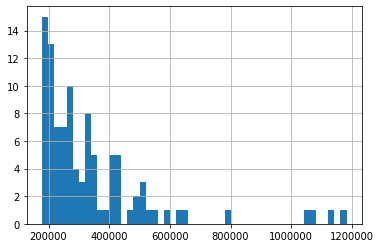

In [40]:
top_n[0:100].hist(bins=50)

In [42]:
top_n[0:50]

cell             1182496
research         1138012
use              1066236
study            1052443
project           786038
aim               651322
provide           638059
develop           600172
data              546876
disease           532764
new               518154
model             517239
development       507604
cancer            498319
program           488312
protein           461433
health            437483
system            436954
patient           433619
propose           433520
mechanism         426081
gene              417015
clinical          410542
identify          409255
human             407084
function          405202
base              388643
determine         372959
result            358743
increase          354302
support           348777
role              342968
effect            340712
mouse             338752
treatment         337260
core              337066
activity          334704
high              334400
target            334394
test              328008


In [ ]:
#To see all the words
top_n.nlargest(100).index

In [15]:
############
#Create datasets for analysis
############

#All data
docs = df['final_tokens'].dropna() #<--If you're having issues merging with a prior dataset, note that this will NOT be the same length as the df overall, because of nulls, so be careful appending
id2word, corpus = LDAvariables.createLDAvars(docs)
pickle.dump([corpus, id2word, docs], open('lda_data_stanford_lemma.sav','wb'))

#The two IDs for abstracts that were a space
print('Abstract IDs with no lemmas in them')
print(set(range(len(docs)))-set(docs.index))

#Just nsf
nsf_docs=df.groupby('AGENCY').get_group('NSF')['final_tokens'].dropna()
id2word, corpus = LDAvariables.createLDAvars(nsf_docs)
pickle.dump([corpus, id2word, nsf_docs], open('nsf_stanford_lemma.sav','wb'))

Abstract IDs with no lemmas in them
{74268, 79910}


In [ ]:
#Old code method:

#Data Cleaning
#df[wa]=df[wa].apply(str.lower)
#df[wa]=df.apply(remove_institution,axis=1) #case sensitive

#Tokenizing
#tokened_abstracts = TextCleaning.tokenize(df['working_abstract'])
#df['tokened_abstracts'] = tokened_abstracts

#Removal of stopwords, starting phrases, and PIs
#no_pis=df.apply(remove_custom_words,axis=1).apply(remove_first_x_tokens,args=[start_phrases_to_remove])
#stopWords = create_stopwords()
#tokened_docs_nostop = TextCleaning.remove_stopwords(no_pis, stopWords)
#df['tokened_docs_nostop'] = tokened_docs_nostop

#n-grams
#bigram = gensim.models.Phrases(df['tokened_docs_nostop'], min_count=5, threshold=100) # higher threshold fewer phrases.
#bigram_docs=df['tokened_docs_nostop'].apply(lambda x: bigram[x])
#trigram = gensim.models.Phrases(bigram_docs, threshold=100)  
#tri_docs =bigram_docs.apply(lambda x: trigram[x])
#df['tns_bi_tri_docs'] = tri_docs

#Lemmatizing
#lemma_docs = TextCleaning.lemmatize(df['tns_bi_tri_docs'])
#df['lemma_abstracts'] = lemma_docs

# save processed text

#df.to_pickle("./processed_dataset.pkl")
#df.to_csv('FRAbstractsProcessed.csv')

# Save only what is needed for LDA - docs, corpus, and dictionary. When loading the entire dataframe, I have run 
# out of memory to run the model

# from Sam's code:
#    corpus = corpus, dictionary = id2word, texts = docs

#docs = df['lemma_abstracts']
#id2word, corpus = LDAvariables.createLDAvars(docs)
#pickle.dump([corpus, id2word, docs], open('lda_data.sav','wb'))